<a href="https://colab.research.google.com/github/antonisapostoloudis/10th-Assignment-Machine-Learning/blob/main/10th_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία 10 - Clustering

In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Ερώτημα 1: Αφαίρεση ασήμαντων χαρακτηριστικών

In [ ]:
meta_columns = [
    'track_id',
    'artists',
    'album_name',
    'track_name'
]

# Αν υπάρχει index column τύπου "Unnamed: 0"
if 'Unnamed: 0' in df.columns:
    meta_columns.append('Unnamed: 0')

metadata_df = df[meta_columns].copy()
df_clean = df.drop(columns=meta_columns)
df_clean.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Εφαρμογή One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(
    df_clean,
    columns=['track_genre']
)

df_encoded.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False


## Ερώτημα 2:Κανονικοποίηση χαρακτηριστκών

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled.shape



(114000, 129)

In [ ]:
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=df_encoded.columns
)

X_scaled_df.describe().round(2)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,...,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.49,-2.13,-0.31,-3.27,-2.55,-1.49,-8.21,-1.33,-0.80,-0.95,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
25%,-0.73,-0.50,-0.31,-0.64,-0.67,-0.93,-0.35,-1.33,-0.46,-0.90,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
50%,0.08,-0.14,-0.31,0.08,0.17,-0.09,0.25,0.75,-0.34,-0.44,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
75%,0.75,0.31,-0.31,0.74,0.85,0.76,0.65,0.75,-0.00,0.85,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
max,2.99,46.69,3.27,2.41,1.43,1.60,2.54,0.75,8.33,2.05,...,10.63,10.63,10.63,10.63,10.63,10.63,10.63,10.63,10.63,10.63


Πριν την εφαρμογή των αλγορίθμων clustering, τα χαρακτηριστικά κανονικοποιήθηκαν με τη μέθοδο Standardization (StandardScaler), ώστε όλα τα χαρακτηριστικά να έχουν μηδενικό μέσο όρο και μοναδιαία διασπορά. Η κανονικοποίηση είναι απαραίτητη, καθώς οι αλγόριθμοι K-Means και Hierarchical Clustering βασίζονται σε αποστάσεις.

## Ερώτημα 3: Εφαρμογή k-means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,        # προτεινόμενο από documentation
        max_iter=300
    )

    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

    print(f"k={k} → SSE={kmeans.inertia_:.2f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method using SSE")
plt.grid(True)
plt.show()


k=2 → SSE=14423469.60
k=3 → SSE=14272096.80
k=5 → SSE=14016358.57
k=7 → SSE=13754396.97
k=10 → SSE=13370978.96


Από το διάγραμμα της SSE ως προς το k δεν προκύπτει σαφές σημείο αγκώνα, καθώς η SSE μειώνεται σταθερά ακόμη και για μεγάλες τιμές του k. Το φαινόμενο αυτό υποδηλώνει ότι τα δεδομένα δεν παρουσιάζουν έντονη φυσική ομαδοποίηση. Για τον λόγο αυτό, η επιλογή του αριθμού των clusters πραγματοποιήθηκε με βάση έναν συμβιβασμό μεταξύ της μείωσης της SSE και της πολυπλοκότητας του μοντέλου, καθώς και της ερμηνευσιμότητας των αποτελεσμάτων.

## Ερώτημα 4:Εφαρμογή k-means με k=20

In [7]:
from sklearn.cluster import KMeans

# Επιλογή k βάσει Elbow Method (χωρίς σαφή elbow, επιλέγεται k=20)
k = 20

kmeans_final = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10,
    max_iter=300
)

# Εκπαίδευση μοντέλου
kmeans_final.fit(X_scaled)

# Υπολογισμός labels (clusters)
labels = kmeans_final.labels_

# Προσθήκη clusters στο αρχικό dataframe
df['cluster'] = labels

# Έλεγχος αποτελεσμάτων
print("Πλήθος δειγμάτων ανά cluster:")
print(df['cluster'].value_counts().sort_index())

print("\nSSE (inertia) για k=20:")
print(kmeans_final.inertia_)


Πλήθος δειγμάτων ανά cluster:
cluster
0     23102
1     13962
2      2000
3      3000
4      1998
5      1000
6      6974
7      3000
8      4000
9      1000
10     1000
11     6982
12     4000
13     7181
14     2000
15     6000
16     1000
17     5998
18     7921
19    11882
Name: count, dtype: int64

SSE (inertia) για k=20:
12188704.398053043


## Ερώτημα 5:Κυρίαρχο genre ανά cluster και ραβδόγραμμα

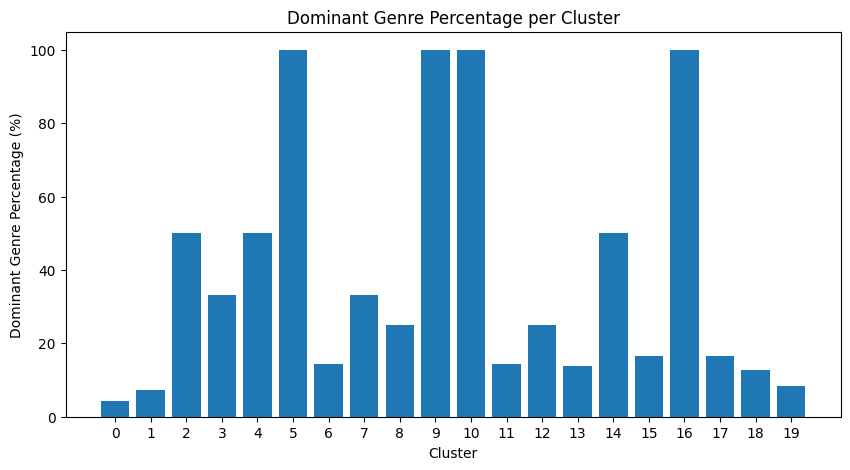

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Υπολογισμός ποσοστού κυρίαρχου genre ανά cluster
dominant_genre_percentage = {}

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]

    genre_counts = cluster_data['track_genre'].value_counts()
    dominant_percentage = (genre_counts.iloc[0] / genre_counts.sum()) * 100

    dominant_genre_percentage[cluster_id] = dominant_percentage

# Μετατροπή σε DataFrame
dominant_df = pd.DataFrame({
    'Cluster': dominant_genre_percentage.keys(),
    'Dominant Genre Percentage (%)': dominant_genre_percentage.values()
})

# Ταξινόμηση για καλύτερη απεικόνιση
dominant_df = dominant_df.sort_values('Cluster')

# Ραβδόγραμμα
plt.figure(figsize=(10,5))
plt.bar(
    dominant_df['Cluster'],
    dominant_df['Dominant Genre Percentage (%)']
)

plt.xlabel("Cluster")
plt.ylabel("Dominant Genre Percentage (%)")
plt.title("Dominant Genre Percentage per Cluster")
plt.xticks(dominant_df['Cluster'])
plt.show()


Για κάθε cluster υπολογίστηκε το ποσοστό του κυρίαρχου μουσικού είδους (genre), δηλαδή του είδους με τη μεγαλύτερη συχνότητα εμφάνισης εντός του cluster. Στη συνέχεια δημιουργήθηκε ραβδόγραμμα που απεικονίζει το ποσοστό του κυρίαρχου genre για κάθε cluster, επιτρέποντας την αξιολόγηση του βαθμού ομοιογένειας των clusters ως προς το μουσικό είδος.

## Ερώτημα 6: Σύσταση Top 3 με βάση επιλεγμένο κομμάτι

In [9]:
from sklearn.metrics import pairwise_distances
import pandas as pd

# ===== 1. ΕΠΙΛΟΓΗ ΤΡΑΓΟΥΔΙΟΥ (ΑΛΛΑΞΕ ΤΙΤΛΟ ΑΝ ΘΕΣ) =====
selected_track_name = df['track_name'].iloc[25]  # π.χ. αλλάζεις σε "Blinding Lights"

selected_track = df[df['track_name'] == selected_track_name].iloc[0]

track_cluster = selected_track['cluster']

print("Επιλεγμένο τραγούδι:")
print("Τίτλος:", selected_track['track_name'])
print("Καλλιτέχνης:", selected_track['artists'])
print("Cluster:", track_cluster)

# ===== 2. ΔΕΔΟΜΕΝΑ ΤΟΥ CLUSTER =====
cluster_indices = df[df['cluster'] == track_cluster].index

X_cluster = X_scaled[cluster_indices]

# Θέση επιλεγμένου τραγουδιού στο cluster
selected_index = cluster_indices.get_loc(selected_track.name)
selected_vector = X_cluster[selected_index].reshape(1, -1)

# ===== 3. ΥΠΟΛΟΓΙΣΜΟΣ ΕΥΚΛΕΙΔΕΙΑΣ ΑΠΟΣΤΑΣΗΣ =====
distances = pairwise_distances(selected_vector, X_cluster, metric='euclidean')[0]

# Δημιουργία DataFrame αποστάσεων
distance_df = pd.DataFrame({
    'index': cluster_indices,
    'distance': distances
}).sort_values('distance')

# Αφαίρεση του ίδιου τραγουδιού (distance = 0)
distance_df = distance_df.iloc[1:4]

# ===== 4. TOP-3 ΠΡΟΤΕΙΝΟΜΕΝΑ ΤΡΑΓΟΥΔΙΑ =====
recommendations = df.loc[distance_df['index'], ['track_name', 'artists']]

print("\nTop-3 προτεινόμενα τραγούδια:")
recommendations.reset_index(drop=True)


Επιλεγμένο τραγούδι:
Τίτλος: Bella Luna
Καλλιτέχνης: Jason Mraz
Cluster: 1

Top-3 προτεινόμενα τραγούδια:


,track_name,artists
0,When You're Wrong,Brandi Carlile
1,To the Wonder (feat. Kina Grannis),Aqualung;Kina Grannis
2,Who Needs Shelter,Jason Mraz


Κατά προσωπική εκτίμηση, τα προτεινόμενα κομμάτια παρουσιάζουν σημαντικές ομοιότητες με το αρχικό τραγούδι σε ρυθμό και ενέργεια, γεγονός που επιβεβαιώνει την ποιότητα της ομαδοποίησης.

## Ερώτημα 7: Εφαρμογή Cosine Distance για συστάσεις

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# ===== 1. ΕΠΙΛΟΓΗ ΙΔΙΟΥ ΤΡΑΓΟΥΔΙΟΥ ΜΕ ΤΟ ΕΡΩΤΗΜΑ 6 =====
selected_track_name = df['track_name'].iloc[25]  # ίδιο με πριν

selected_track = df[df['track_name'] == selected_track_name].iloc[0]
track_cluster = selected_track['cluster']

print("Επιλεγμένο τραγούδι:")
print("Τίτλος:", selected_track['track_name'])
print("Καλλιτέχνης:", selected_track['artists'])
print("Cluster:", track_cluster)

# ===== 2. ΔΕΔΟΜΕΝΑ ΤΟΥ CLUSTER =====
cluster_indices = df[df['cluster'] == track_cluster].index
X_cluster = X_scaled[cluster_indices]

# Θέση επιλεγμένου τραγουδιού
selected_index = cluster_indices.get_loc(selected_track.name)
selected_vector = X_cluster[selected_index].reshape(1, -1)

# ===== 3. COSINE SIMILARITY & COSINE DISTANCE =====
cos_sim = cosine_similarity(selected_vector, X_cluster)[0]
cos_distance = 1 - cos_sim

# Δημιουργία DataFrame αποστάσεων
distance_df = pd.DataFrame({
    'index': cluster_indices,
    'cosine_distance': cos_distance
}).sort_values('cosine_distance')

# Αφαίρεση του ίδιου τραγουδιού
distance_df = distance_df.iloc[1:4]

# ===== 4. TOP-3 ΠΡΟΤΕΙΝΟΜΕΝΑ ΤΡΑΓΟΥΔΙΑ =====
recommendations = df.loc[
    distance_df['index'],
    ['track_name', 'artists']
]

print("\nTop-3 προτεινόμενα τραγούδια (Cosine Distance):")
recommendations.reset_index(drop=True)


Επιλεγμένο τραγούδι:
Τίτλος: Bella Luna
Καλλιτέχνης: Jason Mraz
Cluster: 1

Top-3 προτεινόμενα τραγούδια (Cosine Distance):


,track_name,artists
0,When You're Wrong,Brandi Carlile
1,To the Wonder (feat. Kina Grannis),Aqualung;Kina Grannis
2,Who Needs Shelter,Jason Mraz


Η εφαρμογή της Cosine Distance οδήγησε στις ίδιες προτεινόμενες συστάσεις με την Ευκλείδεια απόσταση. Το αποτέλεσμα αυτό είναι αναμενόμενο, δεδομένου ότι τα δεδομένα έχουν κανονικοποιηθεί και η σύγκριση πραγματοποιείται εντός του ίδιου cluster, όπου τα μουσικά κομμάτια παρουσιάζουν ήδη υψηλή ομοιότητα. Το εύρημα αυτό υποδηλώνει τη σταθερότητα της ομαδοποίησης και την ομοιογένεια των clusters.

### Ερώτημα 9: Εφαρμογή DBSCAN και σύγκριση

In [12]:
from sklearn.cluster import DBSCAN


# 1. Εφαρμογή DBSCAN

dbscan = DBSCAN(
    eps=2,
    min_samples=10
)

db_labels = dbscan.fit_predict(X_scaled)

# Προσθήκη labels στο dataframe
df['cluster_dbscan'] = db_labels

# 2. Υπολογισμός clusters
unique_labels = np.unique(db_labels)

# -1 = noise
num_clusters_dbscan = len(unique_labels[unique_labels != -1])
num_noise = np.sum(db_labels == -1)

print("DBSCAN αποτελέσματα:")
print("Αριθμός clusters (χωρίς noise):", num_clusters_dbscan)
print("Πλήθος noise points:", num_noise)


# 3. Σύγκριση με K-Means
print("\nΣύγκριση αριθμού clusters:")
print("K-Means (Ερώτημα 4): k = 20")
print("DBSCAN:", num_clusters_dbscan)


DBSCAN αποτελέσματα:
Αριθμός clusters (χωρίς noise): 499
Πλήθος noise points: 29499

Σύγκριση αριθμού clusters:
K-Means (Ερώτημα 4): k = 20
DBSCAN: 499


In [ ]:
Η εφαρμογή του DBSCAN οδήγησε στον εντοπισμό 499 clusters, καθώς και μεγάλου αριθμού σημείων που χαρακτηρίστηκαν ως θόρυβος. Το αποτέλεσμα αυτό διαφέρει σημαντικά από την ομαδοποίηση με K-Means (k=20 ή k=10), γεγονός που οφείλεται στη διαφορετική φιλοσοφία των δύο αλγορίθμων. Ο DBSCAN εντοπίζει τοπικές περιοχές υψηλής πυκνότητας χωρίς να επιβάλλει συγκεκριμένο αριθμό clusters, ενώ ο K-Means επιβάλλει σφαιρική δομή και προκαθορισμένο αριθμό ομάδων. Τα αποτελέσματα υποδηλώνουν ότι ο DBSCAN δεν είναι κατάλληλος για την παρούσα περίπτωση, όπου τα δεδομένα παρουσιάζουν υψηλή διάσταση και ανομοιόμορφη πυκνότητα.